# `코칭스터디 <Data Science 2024>`
- Jason코치_07팀_3주차_미션제출
- 리드부스터: 동동이_리더
- 부스터: 권순환, 김민서, 조수영, 나영민, 노아, 세현, Peridot

# 📌 미션에 도전하기 전에 먼저!!
이번 미션에 활용되는 데이터를 다운로드 받기 위해, 주피터 노트북에서 다음 셀을 먼저 실행해주세요.

나의 컴퓨터 환경에 데이터를 저장하지 않아도, 웹 사이트에서 바로 데이터를 받아올 수 있습니다. 

원활한 피드백을 위해 미션을 제출할 때에도 아래 코드를 꼭 포함해서 제출해주세요!
[참고] 한글폰트 설정 : https://github.com/ychoi-kr/koreanize-matplotlib

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

# Q1

### 📌 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 
### 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [158]:
#딕셔너리 생성
age_code = {
    1: '0~4세', 2: '5~9세', 3: '10~14세', 4: '15~19세', 5: '20~24세',
    6: '25~29세', 7: '30~34세', 8: '35~39세', 9: '40~44세', 10: '45~49세',
    11: '50~54세', 12: '55~59세', 13: '60~64세', 14: '65~69세', 15: '70~74세',
    16: '75~79세', 17: '80~84세', 18: '85세+'
}

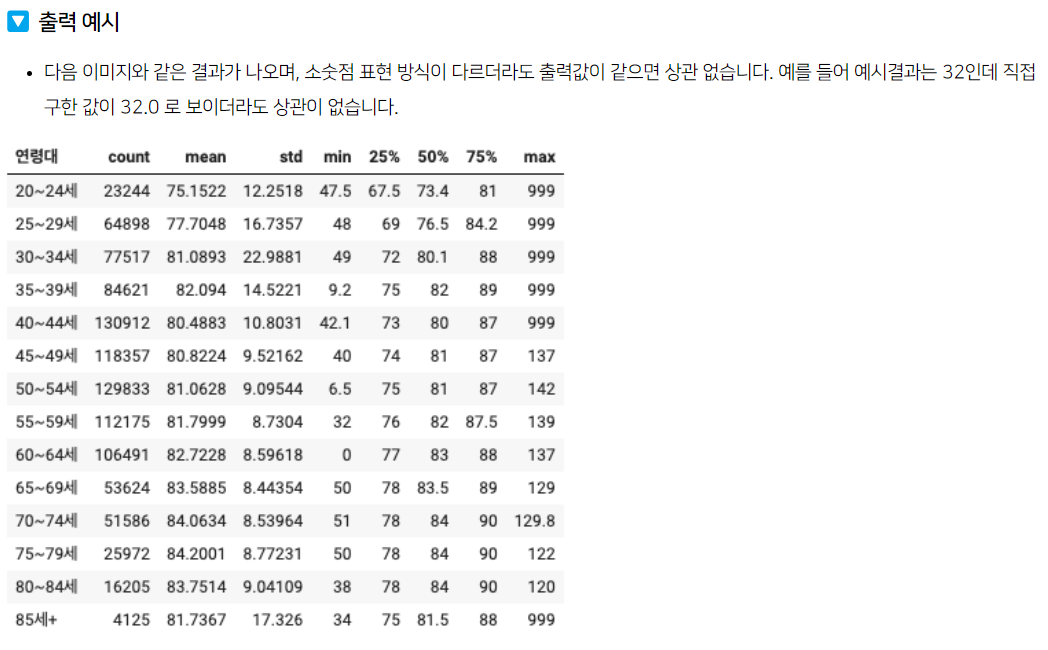

# A1️⃣

In [159]:
#  map 메서드를 사용하여 df의 '연령대코드(5세단위)' 열을 '연령대'로 변환합니다.
# map 메서드는 딕셔너리 age_code를 참조하여 각 코드에 대응하는 연령대 문자열로 변환합니다.

df['연령대'] = df['연령대코드(5세단위)'].map(age_code)

In [160]:
# 연령대별 허리둘레에 대한 기술통계

df.groupby(["연령대"])["허리둘레"].describe()

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


# A2️⃣

In [161]:
# pivot_table 사용
df['연령대'] = df['연령대코드(5세단위)'].map(age_code)
pd.pivot_table(df, index='연령대', values='허리둘레', aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
연령대,,,,,,,,
20~24세,67.5,73.4,81.0,23244.0,999.0,75.152220,47.5,12.251781
25~29세,69.0,76.5,84.2,64898.0,999.0,77.704783,48.0,16.735734
30~34세,72.0,80.1,88.0,77517.0,999.0,81.089268,49.0,22.988111
35~39세,75.0,82.0,89.0,84621.0,999.0,82.094012,9.2,14.522095
40~44세,73.0,80.0,87.0,130912.0,999.0,80.488308,42.1,10.803098
45~49세,74.0,81.0,87.0,118357.0,137.0,80.822449,40.0,9.521622
50~54세,75.0,81.0,87.0,129833.0,142.0,81.062754,6.5,9.095438
55~59세,76.0,82.0,87.5,112175.0,139.0,81.799905,32.0,8.730398
60~64세,77.0,83.0,88.0,106491.0,137.0,82.722769,0.0,8.596176


# Q2

### 📌Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

### 다음의 결과가 나오도록 합니다. 이 때 그래프의 색상, 스타일 표현방식에 차이가 있더라도 상관계수값이 차이가 없다면 문제 없습니다.
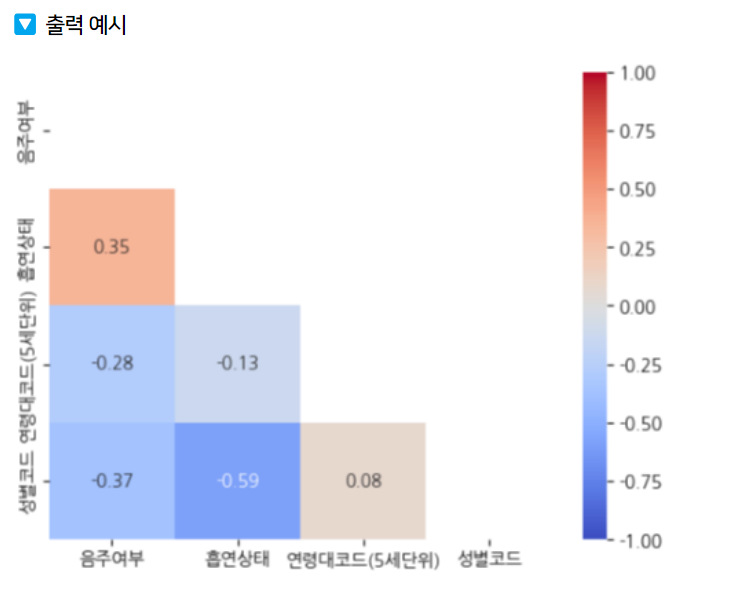

# A1️⃣

<AxesSubplot:>

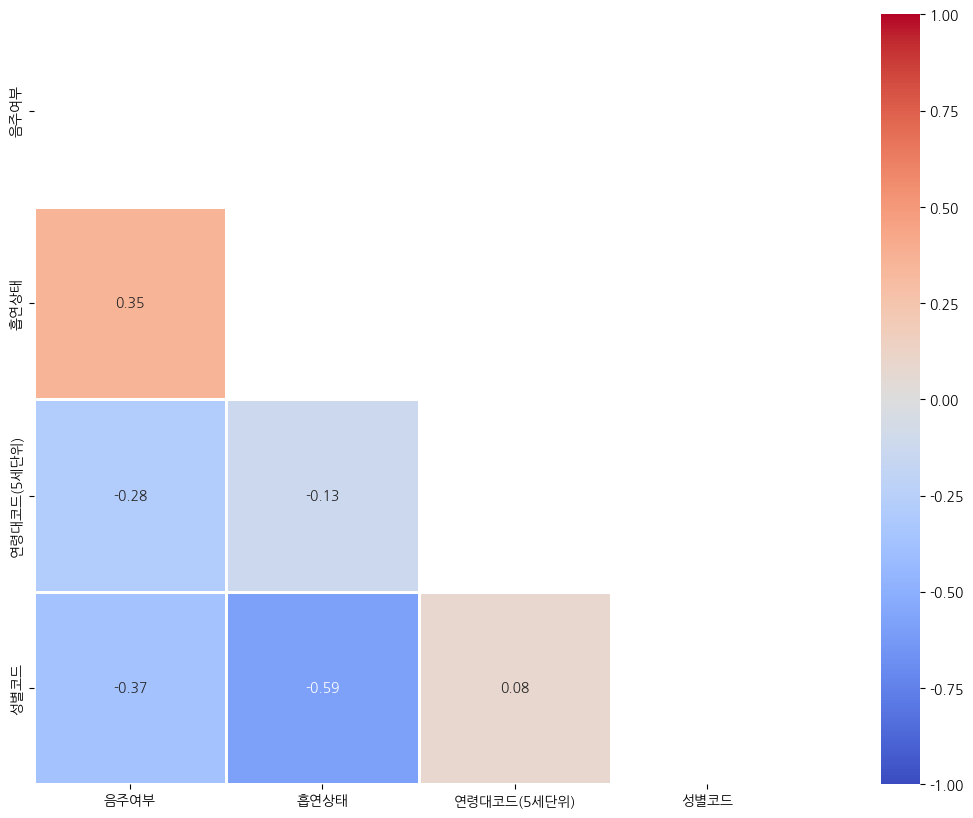

In [162]:
columns = ["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]

df_c = df[columns]
df_corr = df_c.corr()

mask = np.triu(np.ones_like(df_corr, dtype = bool))

plt.figure(figsize = (20,10))
sns.heatmap(df_corr, annot=True, fmt=".2f", mask=mask, square = True, cmap = "coolwarm", vmax =1.0, vmin=-1.0, linewidths=1)

# Q3

### 📌 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

```
건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!

```

In [190]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

# df["흡연"]
# df["음주"]

* groupby, pivot_table로 구할 수도 있지만, 수업에서는 다루지 않았던 pandas의 crosstab 기능을 사용해서도 비교적 쉽게 구할 수 있습니다.
* crosstab 을 사용할 때는 다음의 문서를 참고하여 구해보세요. pandas.crosstab — pandas documentation
* 그리고 막대그래프를 통해 결과를 시각화해주세요! 시각화를 할 때 그래프의 스타일이나 막대의 색상 등이 달라도 상관 없으니 사용하고 싶은 스타일을 적용해서 시각화해도 좋습니다.
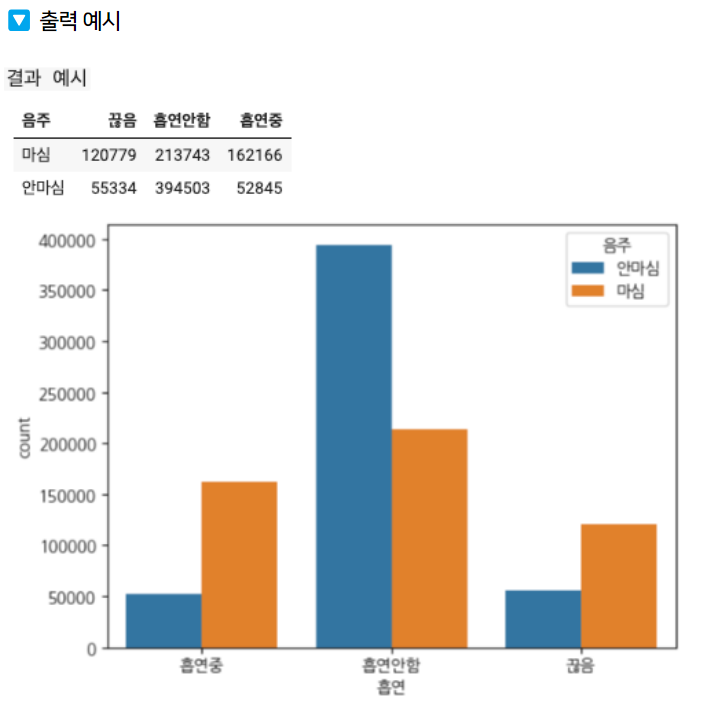

# A1️⃣

In [191]:
df['흡연'] = df['흡연상태'].replace(smoke)
df['음주'] = df['음주여부'].replace(drink)

pd.crosstab(index = df['음주'], columns = df['흡연'])

흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


(array([0, 1, 2]), [Text(0, 0, '흡연중'), Text(1, 0, '흡연안함'), Text(2, 0, '끊음')])

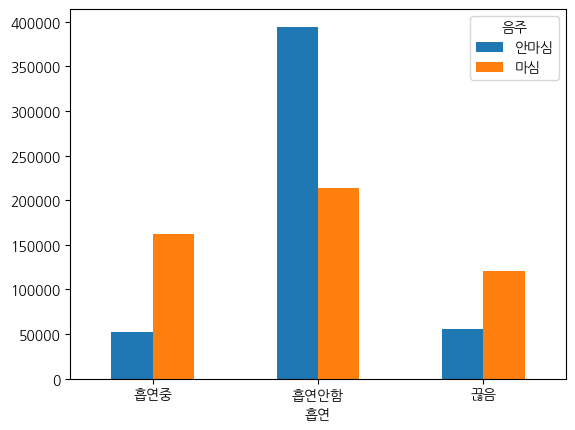

In [167]:
df['음주'] = pd.Categorical(df['음주'], categories=['안마심', '마심'], ordered=True)
df['흡연'] = pd.Categorical(df['흡연'], categories=['흡연중', '흡연안함','끊음'], ordered=True)

pd.crosstab(index = df['흡연'], columns = df['음주']).plot(kind = 'bar')
plt.xticks(rotation=0)

# Q4

### 📌 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

* 체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.
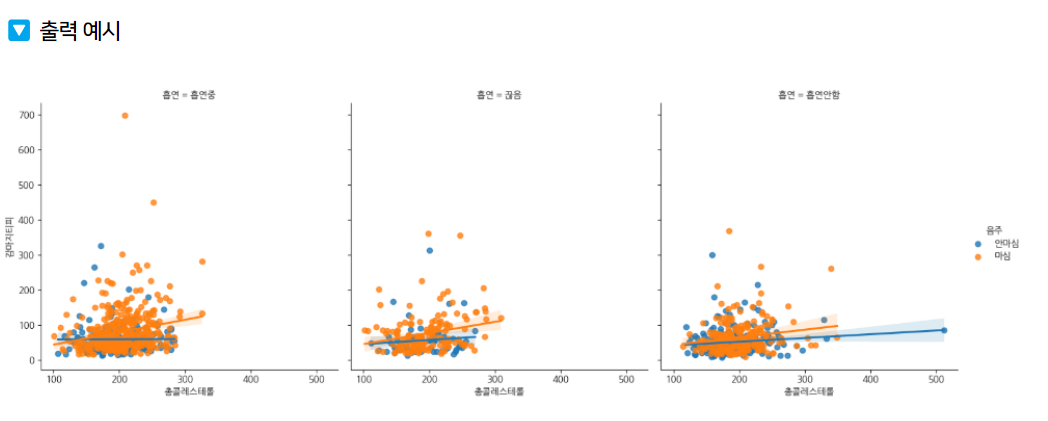

In [202]:
# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [196]:
smoke = {1: "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

df_weight['흡연상태'] = df_weight['흡연상태'].map(smoke)
df_weight['음주여부'] = df_weight['음주여부'].map(drink)

In [197]:
df_weight = df[(df["체중(5Kg 단위)"] >= 120)]

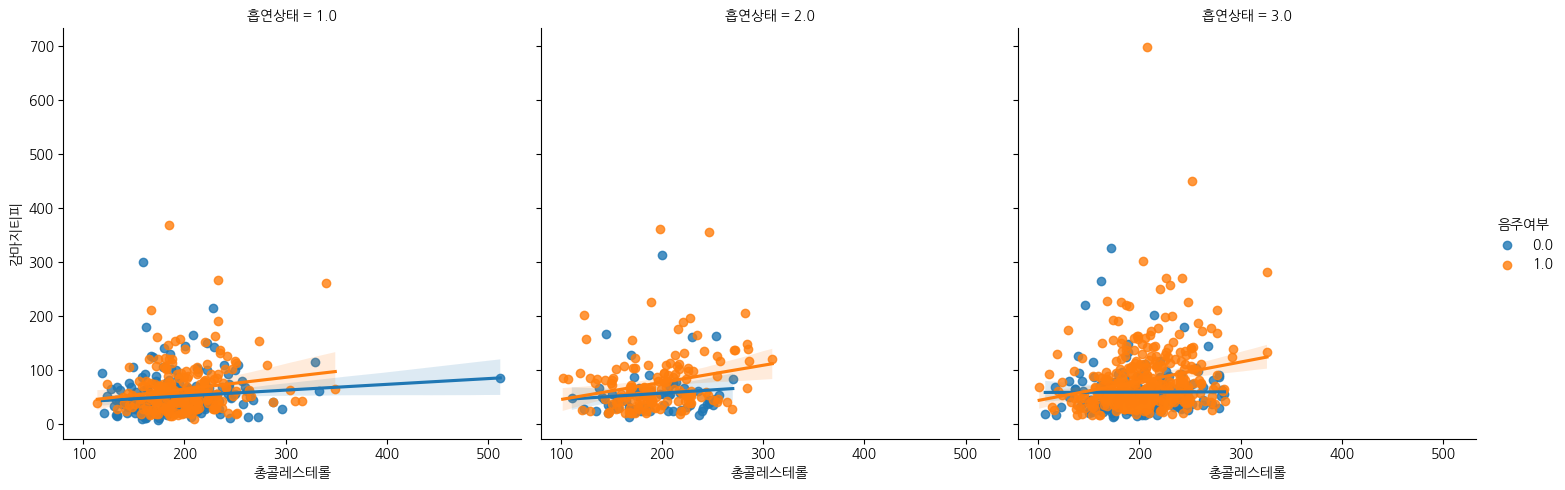

In [198]:
sns.lmplot(data=df_weight, x="총콜레스테롤",y="감마지티피", hue="음주여부", col="흡연상태")

# Q5

📌 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.

실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!

서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)

시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.
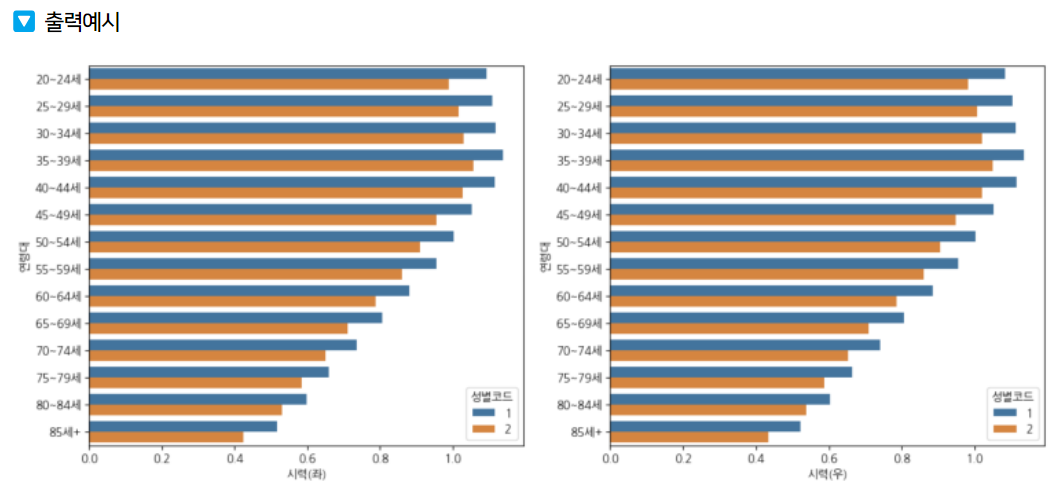

#### 시력이 2.5 이하인 정상 데이터만 필터링

In [203]:
df_filter = df[(df['시력(좌)'] <= 2.5) & (df['시력(우)'] <= 2.5)].copy()

#### 연령대 코드 매핑해주기

#### 연령대 및 성별에 따른 좌우 시력 ( 인덱스를 초기화해줌)

In [205]:
avg_vision = df_filter.groupby(['연령대코드(5세단위)', '성별코드'])[['시력(좌)', '시력(우)']].mean().reset_index()

#### 시각화

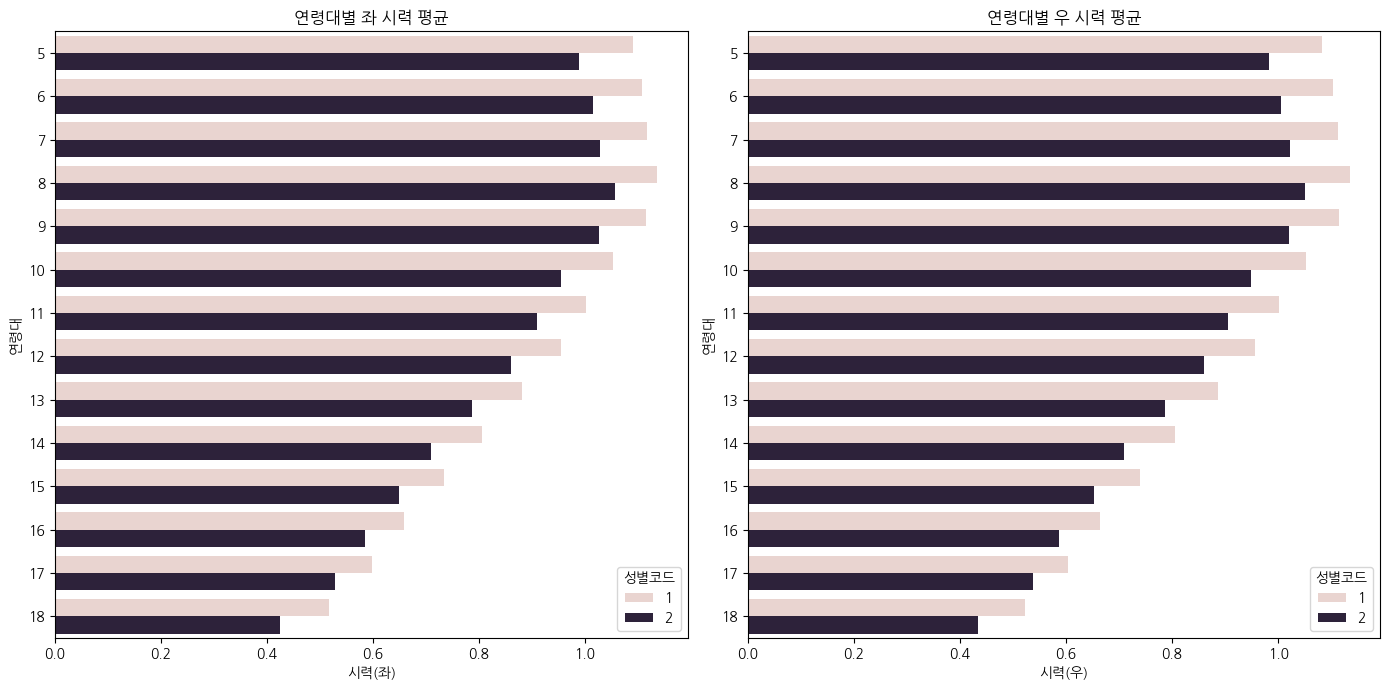

In [206]:
plt.figure(figsize=(14, 7))

# 좌 시력 평균 시각화
plt.subplot(1, 2, 1)
sns.barplot(data=avg_vision, x='시력(좌)', y='연령대코드(5세단위)', hue='성별코드', orient='h')
plt.title('연령대별 좌 시력 평균')
plt.xlabel('시력(좌)')
plt.ylabel('연령대')

# 우 시력 평균 시각화
plt.subplot(1, 2, 2)
sns.barplot(data=avg_vision, x='시력(우)', y='연령대코드(5세단위)', hue='성별코드', orient='h')
plt.title('연령대별 우 시력 평균')
plt.xlabel('시력(우)')
plt.ylabel('연령대')

plt.tight_layout()
plt.show()